In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
bmx_1999_2000 = pd.read_sas('BMX.XPT')
bmx_2017_2018 = pd.read_sas('BMX_J.XPT')
demog_1999_2000 = pd.read_sas('DEMO.XPT')
demog_2017_2018 = pd.read_sas('DEMO_J.XPT')

In [4]:
BMW_cols = ['SEQN', 'BMXWT', 'BMXHT']
demog_cols = ['SEQN', 'RIDAGEYR']
bmx_1999_2000 = bmx_1999_2000[BMW_cols]
bmx_2017_2018 = bmx_2017_2018[BMW_cols]
demog_1999_2000 = demog_1999_2000[demog_cols]
demog_2017_2018 = demog_2017_2018[demog_cols]

In [5]:
demog_1999_2000.head()

,SEQN,RIDAGEYR
0,1.0,2.0
1,2.0,77.0
2,3.0,10.0
3,4.0,1.0
4,5.0,49.0


In [6]:
demog_2017_2018.head()

,SEQN,RIDAGEYR
0,93703.0,2.0
1,93704.0,2.0
2,93705.0,66.0
3,93706.0,18.0
4,93707.0,13.0


In [7]:
study_1999_2000 = pd.merge(bmx_1999_2000, demog_1999_2000, on='SEQN', how='outer', indicator=True)
study_2017_2018= pd.merge(bmx_2017_2018, demog_2017_2018, on='SEQN', how='outer', indicator=True)
study_2017_2018

,SEQN,BMXWT,BMXHT,RIDAGEYR,_merge
0,93703.0,13.7,88.6,2.0,both
1,93704.0,13.9,94.2,2.0,both
2,93705.0,79.5,158.3,66.0,both
3,93706.0,66.3,175.7,18.0,both
4,93707.0,45.4,158.4,13.0,both
...,...,...,...,...,...
9249,102952.0,49.0,156.5,70.0,both
9250,102953.0,97.4,164.9,42.0,both
9251,102954.0,69.1,162.6,41.0,both
9252,102955.0,111.9,156.6,14.0,both


In [8]:
study_1999_2000.groupby(["_merge"]).count()
study_2017_2018.groupby(["_merge"]).count()

C:\Users\pabma\AppData\Local\Temp\ipykernel_25076\2098831985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_1999_2000.groupby(["_merge"]).count()
C:\Users\pabma\AppData\Local\Temp\ipykernel_25076\2098831985.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_2017_2018.groupby(["_merge"]).count()


,SEQN,BMXWT,BMXHT,RIDAGEYR
_merge,,,,
left_only,0,0,0,0
right_only,550,0,0,550
both,8704,8580,8016,8704


In [22]:
bmx_1999_2000['SEQN'].nunique() # Comprobamos que no hay duplicados
bmx_2017_2018['SEQN'].nunique() # Comprobamos que no hay duplicados

8704

In [10]:
# Eliminamos todos los que no sean both
study_1999_2000 = study_1999_2000[study_1999_2000['_merge'] == 'both']
study_1999_2000.groupby(["_merge"]).count() 

C:\Users\pabma\AppData\Local\Temp\ipykernel_25076\2932601015.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_1999_2000.groupby(["_merge"]).count()


,SEQN,BMXWT,BMXHT,RIDAGEYR
_merge,,,,
left_only,0,0,0,0
right_only,0,0,0,0
both,9282,9197,8464,9282


In [11]:
study_2017_2018 = study_2017_2018[study_2017_2018['_merge'] == 'both']
study_2017_2018.groupby(["_merge"]).count() 

C:\Users\pabma\AppData\Local\Temp\ipykernel_25076\3873883181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_2017_2018.groupby(["_merge"]).count()


,SEQN,BMXWT,BMXHT,RIDAGEYR
_merge,,,,
left_only,0,0,0,0
right_only,0,0,0,0
both,8704,8580,8016,8704


<Axes: ylabel='Frequency'>

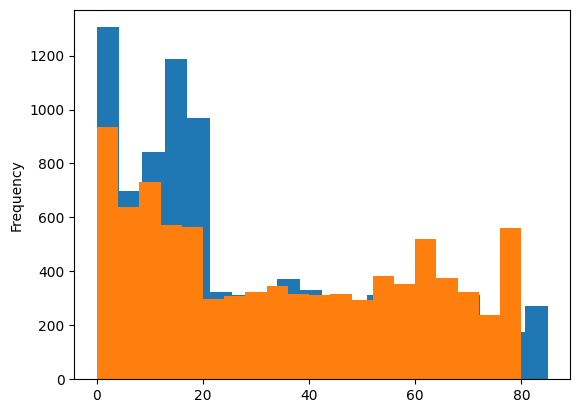

In [12]:
study_1999_2000['RIDAGEYR'].plot.hist(bins=20)
study_2017_2018['RIDAGEYR'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

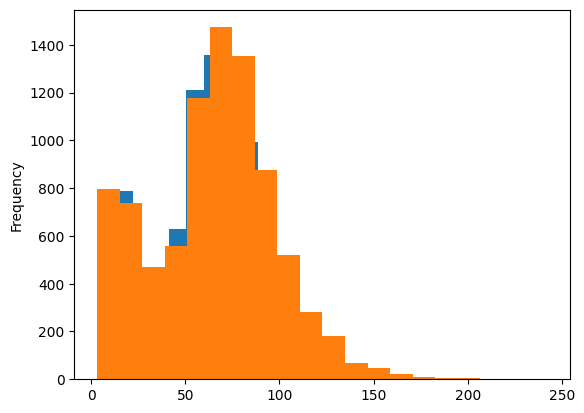

In [13]:
study_1999_2000['BMXWT'].plot.hist(bins=20)
study_2017_2018['BMXWT'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

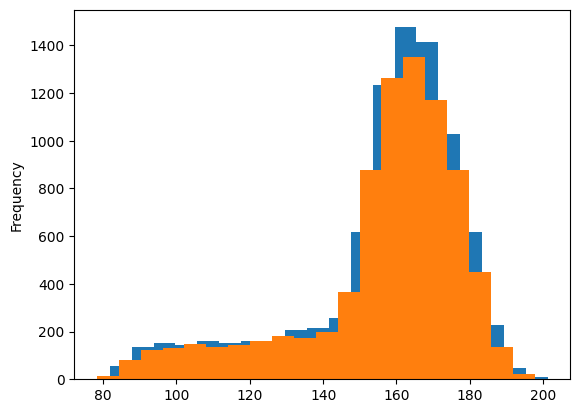

In [14]:
study_1999_2000['BMXHT'].plot.hist(bins=20)
study_2017_2018['BMXHT'].plot.hist(bins=20)

In [15]:
# Ahora quitamos a los menores de 21 años
study_1999_2000 = study_1999_2000[study_1999_2000['RIDAGEYR'] > 21]
study_2017_2018 = study_2017_2018[study_2017_2018['RIDAGEYR'] > 21]
study_1999_2000['RIDAGEYR'].min()
study_2017_2018['RIDAGEYR'].min()


22.0

<Axes: ylabel='Frequency'>

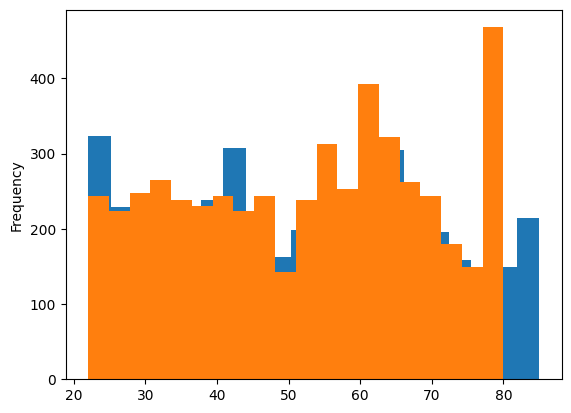

In [16]:
study_1999_2000['RIDAGEYR'].plot.hist(bins=20)
study_2017_2018['RIDAGEYR'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

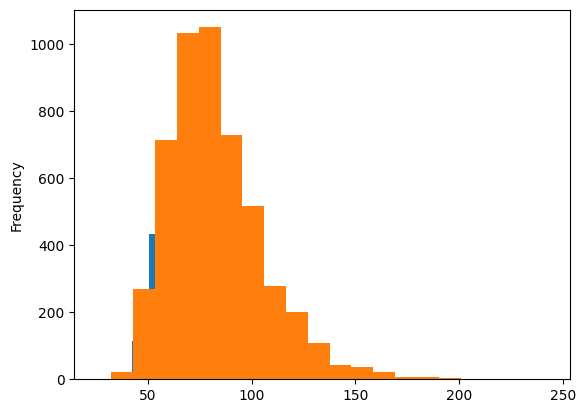

In [17]:
study_1999_2000['BMXWT'].plot.hist(bins=20)
study_2017_2018['BMXWT'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

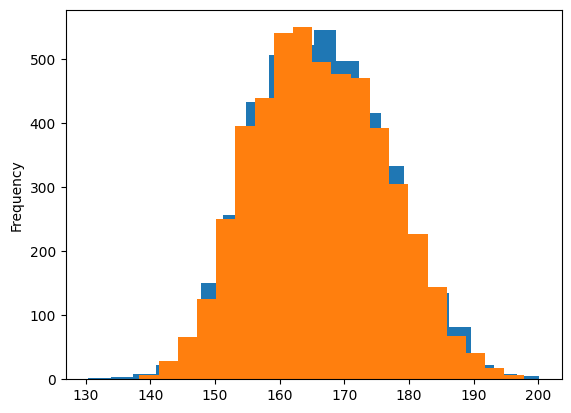

In [18]:
study_1999_2000['BMXHT'].plot.hist(bins=20)
study_2017_2018['BMXHT'].plot.hist(bins=20)

<Axes: xlabel='BMXWT', ylabel='Count'>

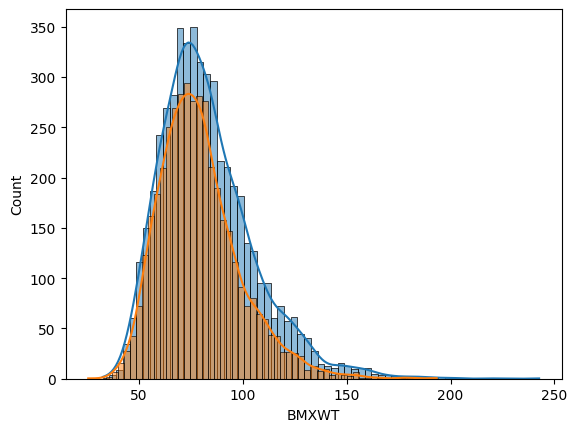

In [21]:
sns.histplot(data=study_2017_2018, x="BMXWT", kde=True)
sns.histplot(data=study_1999_2000, x="BMXWT", kde=True)

In [20]:
# Hacemos el p-valor
p_1999 = study_1999_2000[study_1999_2000['BMXWT']].dropna().values
p_2017 = study_2017_2018[study_2017_2018['BMXWT']].dropna().values

ttest = stats.ttest_ind(p_1999, p_2017, equal_var=False)
ttest


KeyError: "None of [Index([ 75.4,  92.5,  78.0, 111.8,  99.2,  63.6,  75.5,  81.6,  41.5,  59.8,\n       ...\n        78.7,  90.1,  97.1,  59.5,  91.2, 104.9,  58.4,  66.4,  83.1,  57.9],\n      dtype='float64', length=4283)] are in the [columns]"